In [105]:
from urllib.request import urlretrieve
url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv'
urlretrieve(url, 'uber-raw-data-sep14.csv')

('uber-raw-data-sep14.csv', <http.client.HTTPMessage at 0x1c83a492c50>)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn import neighbors, datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
import glob

%matplotlib inline
sns.set()
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
np.corrcoef([df['sepal_length'].values, df['sepal_width'].values])

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

In [21]:
df.groupby('class').corr(method='pearson')

petal_length  petal_width  sepal_length  \
class                                                                   
Iris-setosa     petal_length      1.000000     0.306308      0.263874   
                petal_width       0.306308     1.000000      0.279092   
                sepal_length      0.263874     0.279092      1.000000   
                sepal_width       0.176695     0.279973      0.746780   
Iris-versicolor petal_length      1.000000     0.786668      0.754049   
                petal_width       0.786668     1.000000      0.546461   
                sepal_length      0.754049     0.546461      1.000000   
                sepal_width       0.560522     0.663999      0.525911   
Iris-virginica  petal_length      1.000000     0.322108      0.864225   
                petal_width       0.322108     1.000000      0.281108   
                sepal_length      0.864225     0.281108      1.000000   
                sepal_width       0.401045     0.537728      0.457228   

                              sepal_width  
class                                      
Iris-setosa     petal_length     0.176695  
                petal_width      0.279973  
                sepal_length     0.746780  
                sepal_width      1.000000  
Iris-versicolor petal_length     0.560522  
                petal_width      0.663999  
                sepal_length     0.525911  
                sepal_width      1.000000  
Iris-virginica  petal_length     0.401045  
                petal_width      0.537728  
                sepal_length     0.457228  
                sepal_width      1.000000

Text(0.5,1,'Luu Minh Quan')

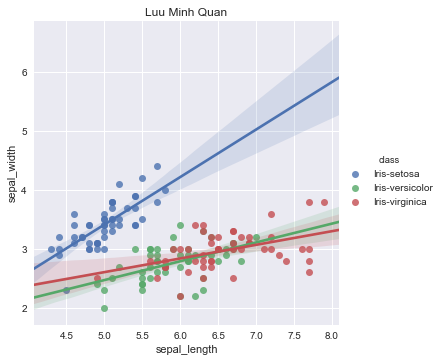

In [22]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='class', data=df)
plt.title('Luu Minh Quan')

Text(0.5,1,'Luu Minh Quan')

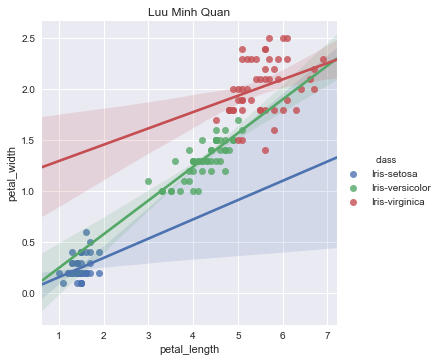

In [23]:
sns.lmplot(x='petal_length', y='petal_width', hue='class', data=df)
plt.title('Luu Minh Quan')

In [24]:
df['class'] = df['class'].astype('category')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.96

In [27]:
kmeans = KMeans(n_clusters=3, random_state=12).fit(X_train)
print('Centers found by KMeans:')
print(kmeans.cluster_centers_)

Centers found by KMeans:
[[5.85365854 2.7195122  4.31707317 1.4       ]
 [5.03235294 3.44117647 1.49411765 0.25294118]
 [6.728      3.104      5.672      2.092     ]]


In [8]:
frames = []
csv_file = glob.glob('uber*.csv')
for csv in csv_file:
    df = pd.read_csv(csv, usecols=[1, 2, 3])
    frames.append(df)
df = pd.concat(frames)
df.shape
df.head()

,Lat,Lon,Base
0,40.7690,-73.9549,B02512
1,40.7267,-74.0345,B02512
2,40.7316,-73.9873,B02512
3,40.7588,-73.9776,B02512
4,40.7594,-73.9722,B02512


In [9]:
df['Base'] = df['Base'].astype('category')

In [10]:
df['Base'].value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [12]:
X_train.head()

,Lat,Lon
160625,40.7258,-74.0055
326922,40.6881,-73.9783
489696,40.7594,-73.9651
119457,40.7621,-73.9721
466903,40.7023,-73.9423


In [13]:
kmeans = KMeans(n_clusters=5, random_state=12).fit(X_train)
print('Centers found by KMeans:')
print(kmeans.cluster_centers_)
y_pred = kmeans.predict(X_test)

Centers found by KMeans:
[[ 40.7968129  -73.88026779]
 [ 40.71567963 -73.98965192]
 [ 40.69571662 -74.20160397]
 [ 40.66577466 -73.76442596]
 [ 40.76202394 -73.97717994]]


In [89]:
?train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int, None, optional
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, otherwise it will 

In [4]:
?np.linalg

Type:        module
String form: <module 'numpy.linalg' from 'D:\\Anaconda\\envs\\py36\\lib\\site-packages\\numpy\\linalg\\__init__.py'>
File:        d:\anaconda\envs\py36\lib\site-packages\numpy\linalg\__init__.py
Docstring:  
Core Linear Algebra Tools
-------------------------
Linear algebra basics:

- norm            Vector or matrix norm
- inv             Inverse of a square matrix
- solve           Solve a linear system of equations
- det             Determinant of a square matrix
- lstsq           Solve linear least-squares problem
- pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                  value decomposition
- matrix_power    Integer power of a square matrix

Eigenvalues and decompositions:

- eig             Eigenvalues and vectors of a square matrix
- eigh            Eigenvalues and eigenvectors of a Hermitian matrix
- eigvals         Eigenvalues of a square matrix
- eigvalsh        Eigenvalues of a Hermitian matrix
- qr              QR deco